## Task -3 TECHNOHACKS

### Social media sentiment Analysis

##### By- Anchal Kapoor

### Problem Statement

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

#### Import the libraries.....

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#### Load the dataset.....

In [2]:
data= pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
print('Rows:',data.shape[0])
print('Columns:', data.shape[1])

Rows: 14640
Columns: 15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
data.describe(include='O')

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,14247,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,5,157,3744


### Univariate and Bivariate Analysis...

##### Univariate Analysis....

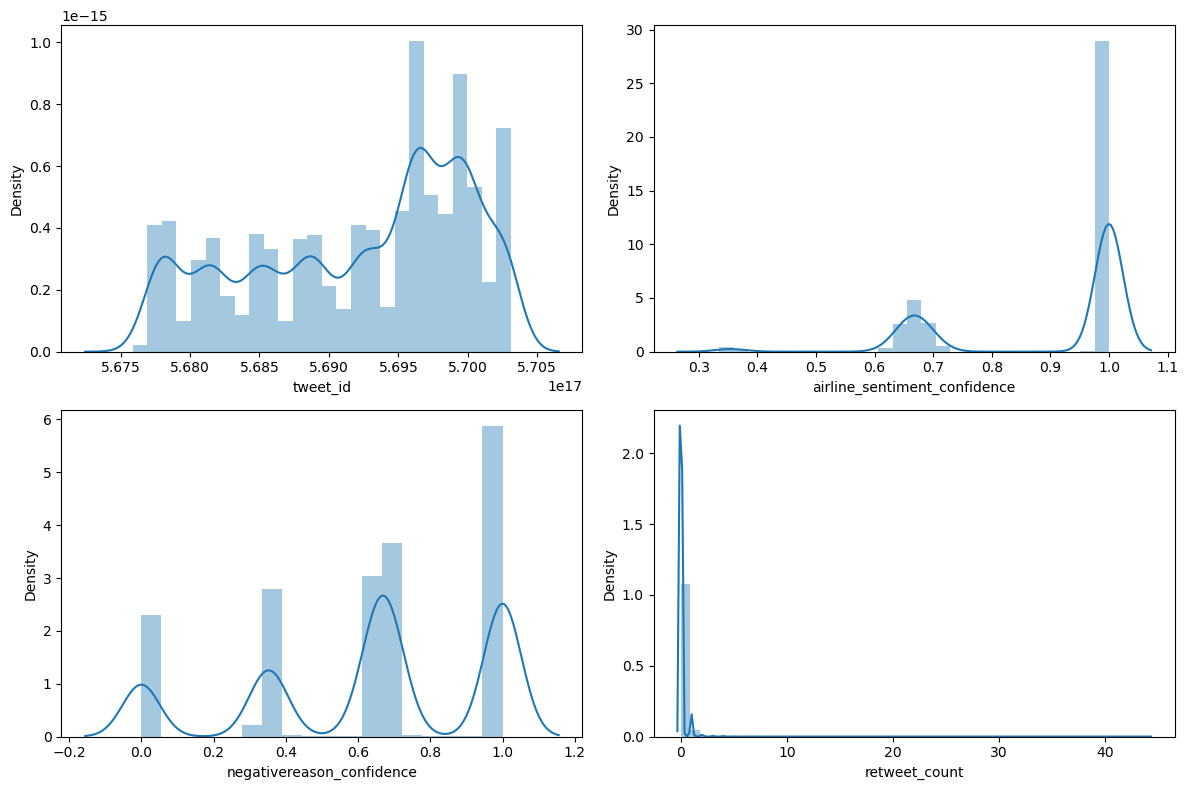

In [7]:
t=1
plt.figure(figsize=(12,8))
for i in data.select_dtypes(np.number):
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    t+=1
    
plt.tight_layout()
plt.show()

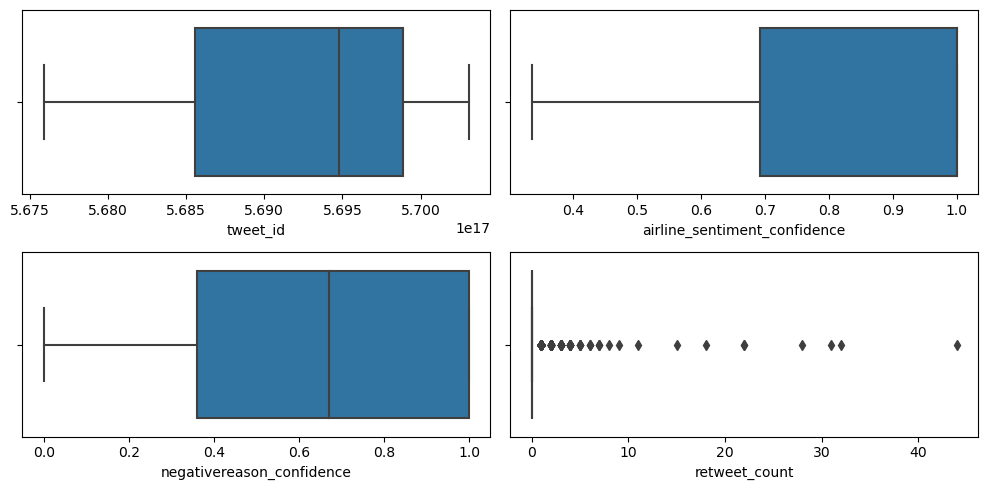

In [8]:
t=1
plt.figure(figsize=(10,5))
for i in data.select_dtypes(np.number):
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

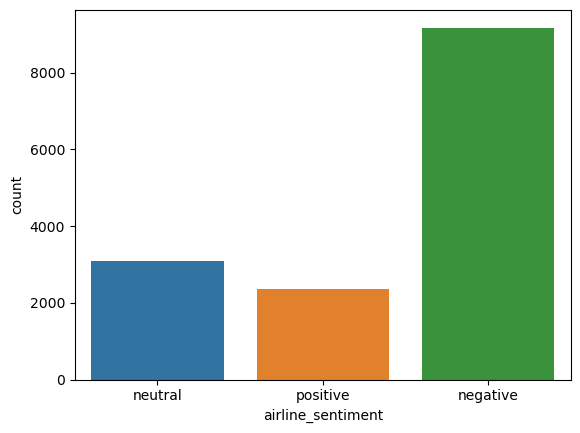

In [9]:
sns.countplot(x=data['airline_sentiment'])
plt.show()

In [10]:
data.select_dtypes(include='O').columns

Index(['airline_sentiment', 'negativereason', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold', 'text',
       'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

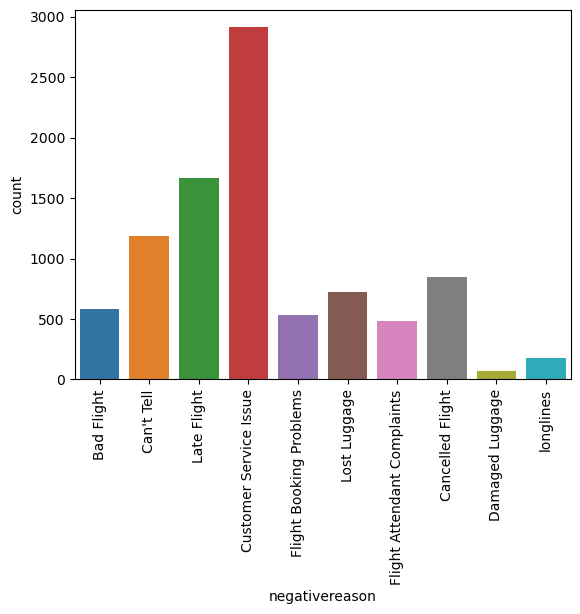

In [11]:
sns.countplot(x=data['negativereason'])
plt.xticks(rotation=90)
plt.show()

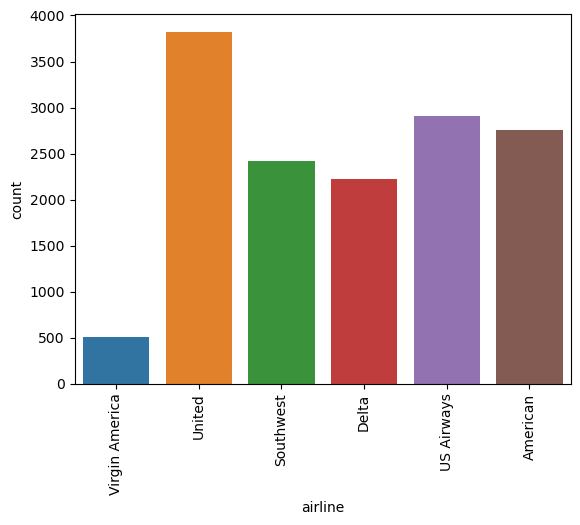

In [12]:
sns.countplot(x=data['airline'])
plt.xticks(rotation=90)
plt.show()

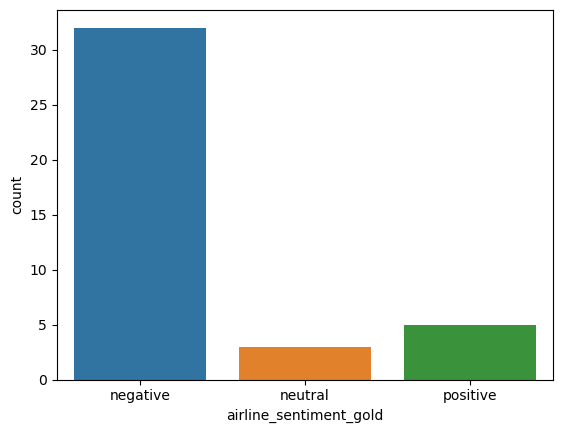

In [13]:
sns.countplot(x=data['airline_sentiment_gold'])
plt.show()

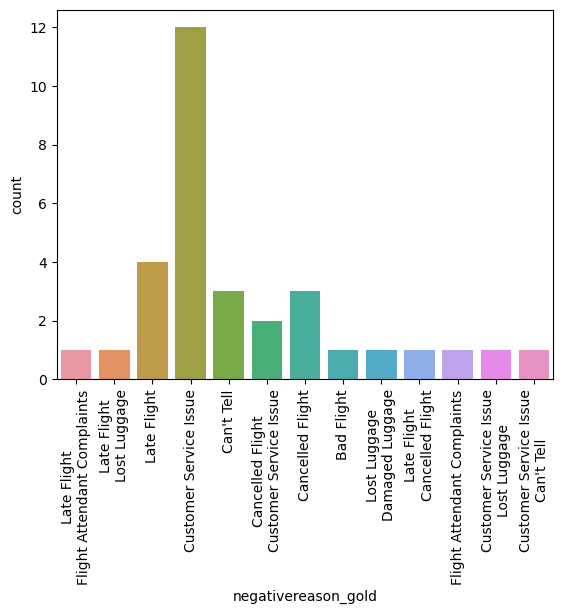

In [14]:
sns.countplot(x=data['negativereason_gold'])
plt.xticks(rotation=90)
plt.show()

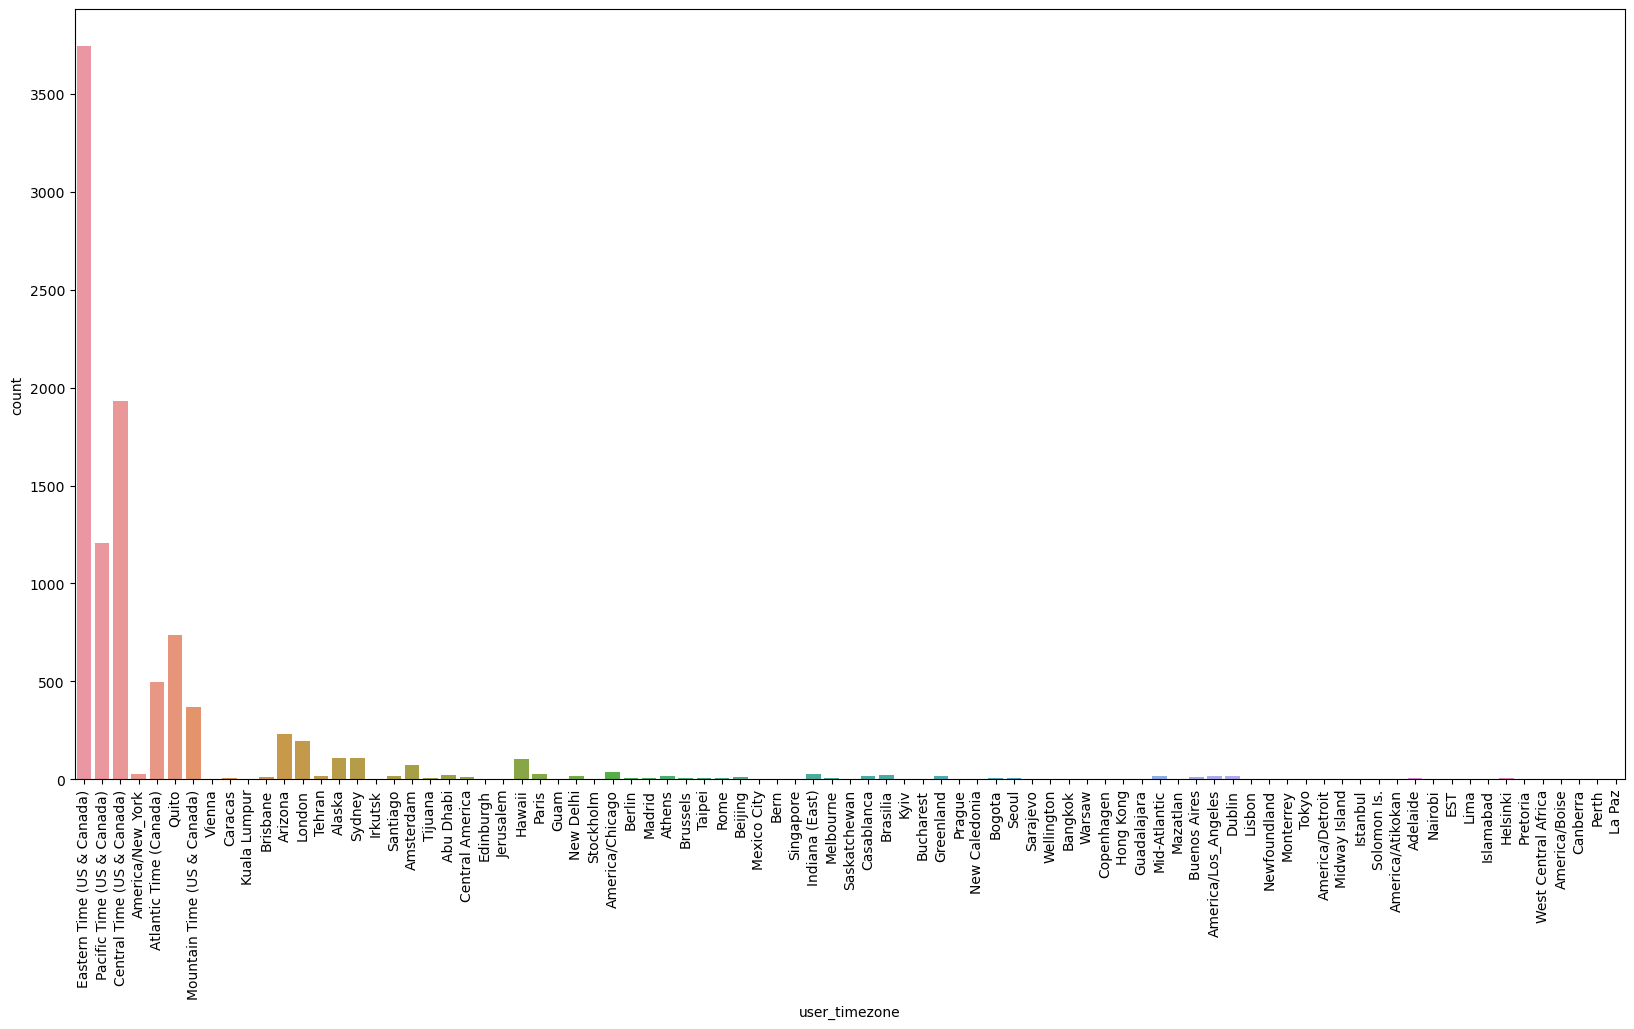

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x=data[ 'user_timezone'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

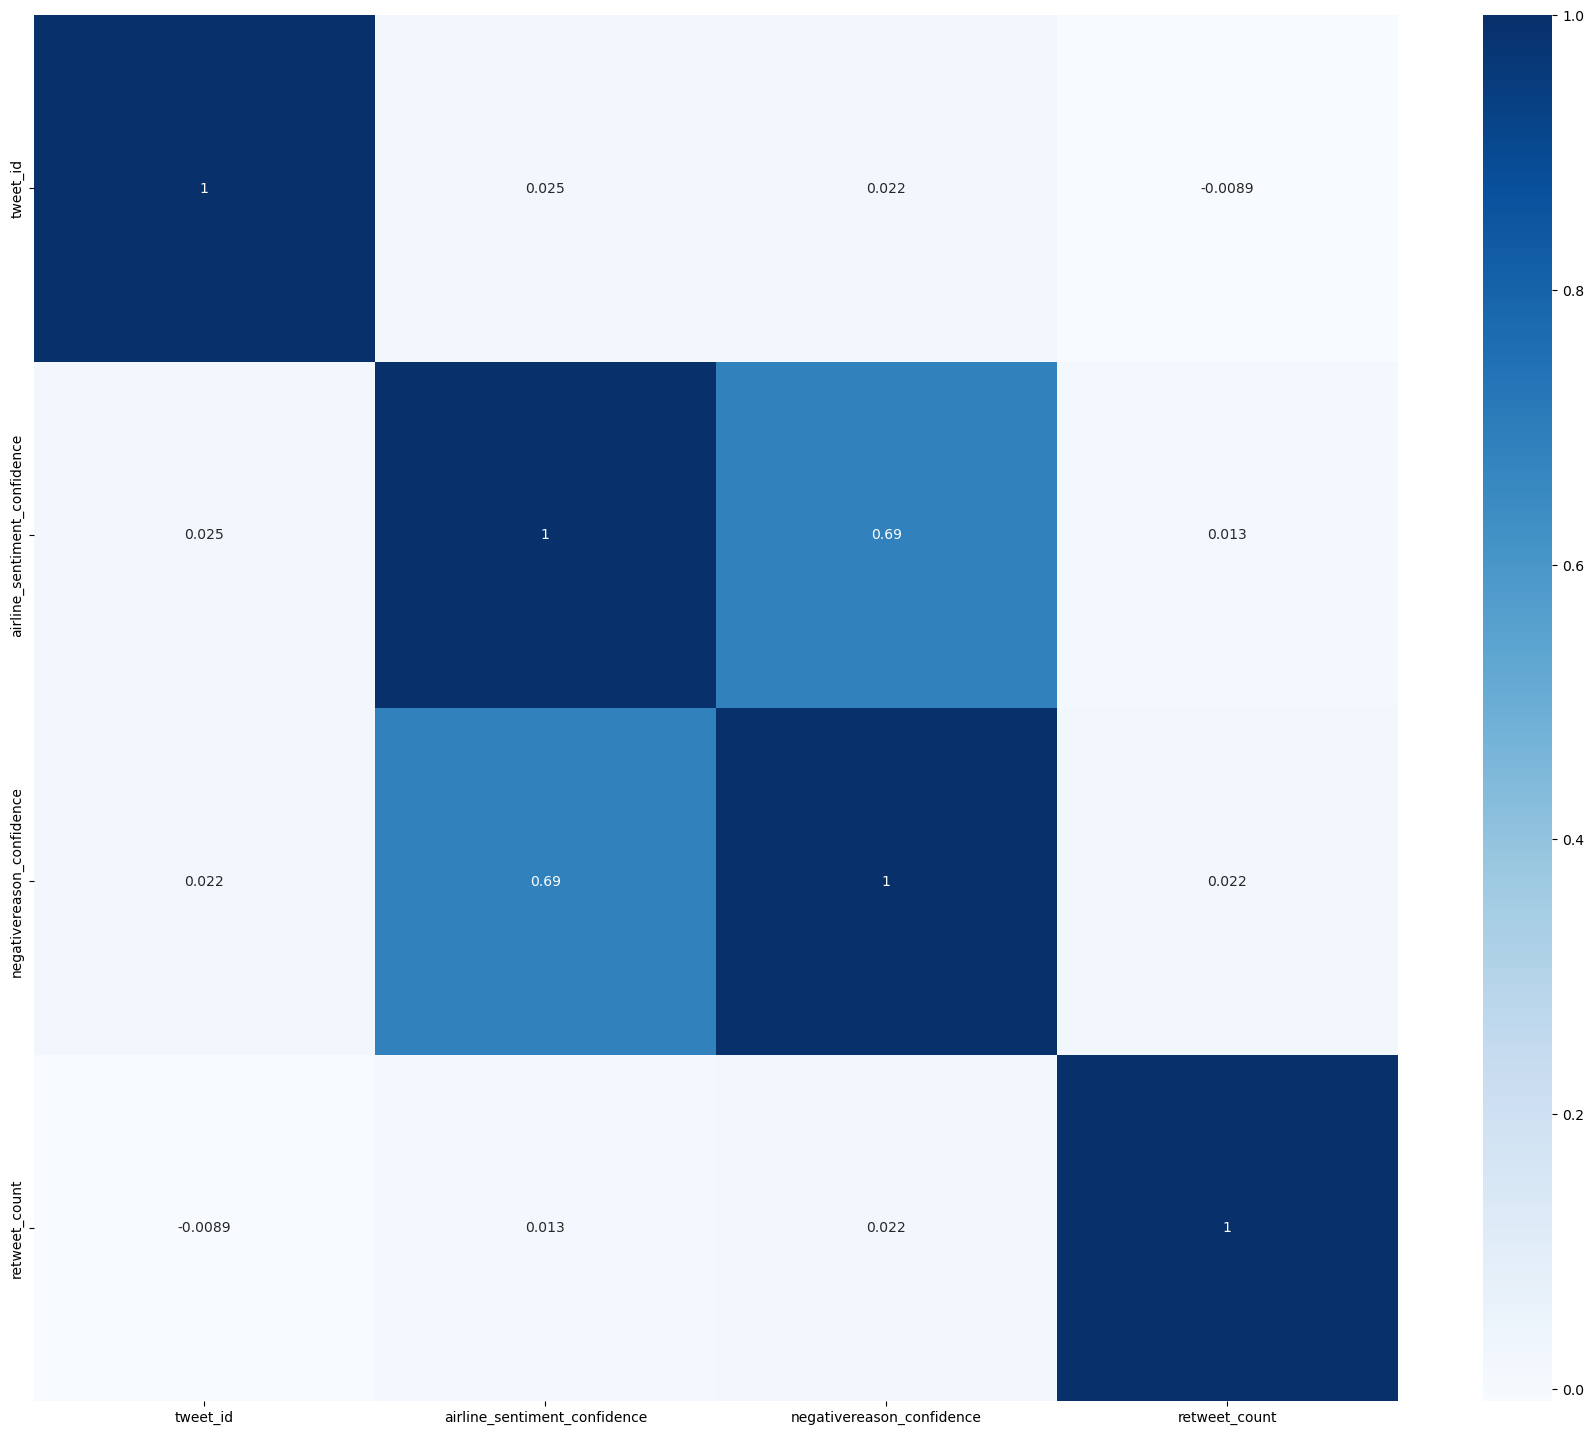

In [16]:
plt.figure(figsize=(22,18))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

#### Missing Value Treatment

In [21]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [26]:
data['airline_sentiment'].value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [25]:
data['negativereason'].value_counts(normalize=True)

Customer Service Issue         0.317063
Late Flight                    0.181412
Can't Tell                     0.129658
Cancelled Flight               0.092286
Lost Luggage                   0.078884
Bad Flight                     0.063195
Flight Booking Problems        0.057638
Flight Attendant Complaints    0.052408
longlines                      0.019394
Damaged Luggage                0.008063
Name: negativereason, dtype: float64

In [22]:
data['negativereason_confidence'].value_counts()

1.0000    3436
0.0000    1344
0.6667      62
0.6632      33
0.6596      29
          ... 
0.3713       1
0.3386       1
0.6449       1
0.3274       1
0.7255       1
Name: negativereason_confidence, Length: 1410, dtype: int64

In [24]:
data['airline_sentiment_gold'].value_counts(normalize=True)

negative    0.800
positive    0.125
neutral     0.075
Name: airline_sentiment_gold, dtype: float64

In [50]:
data.groupby(by='airline')[['tweet_id']].count().sort_values(by='tweet_id',ascending=False)

,tweet_id
airline,
United,3822
US Airways,2913
American,2759
Southwest,2420
Delta,2222
Virgin America,504


In [45]:
data.groupby(by='airline')[['airline_sentiment']].value_counts(normalize=True)

airline         airline_sentiment
American        negative             0.710402
                neutral              0.167814
                positive             0.121783
Delta           negative             0.429793
                neutral              0.325383
                positive             0.244824
Southwest       negative             0.490083
                neutral              0.274380
                positive             0.235537
US Airways      negative             0.776862
                neutral              0.130793
                positive             0.092345
United          negative             0.688906
                neutral              0.182365
                positive             0.128728
Virgin America  negative             0.359127
                neutral              0.339286
                positive             0.301587
dtype: float64

#### Check the words mentioned in the positive tweets....

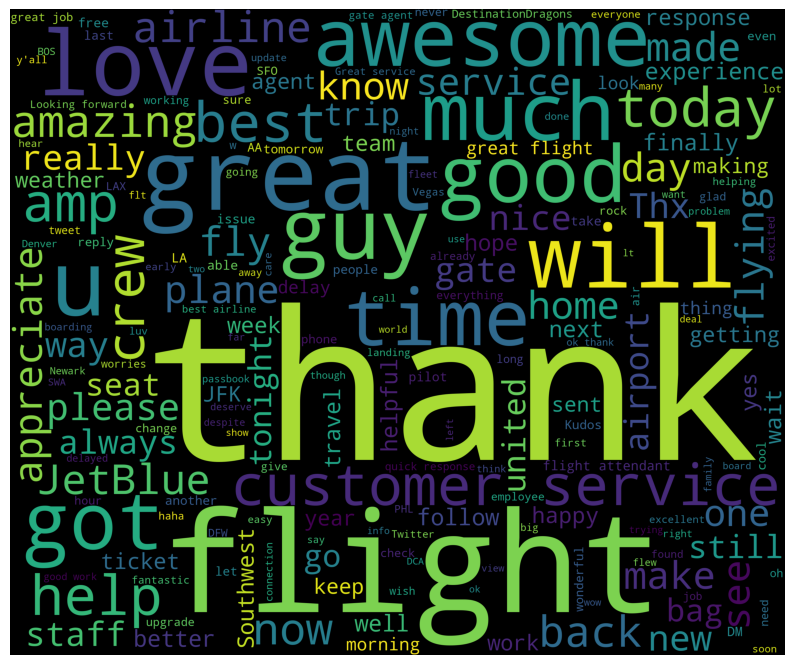

In [63]:
from wordcloud import WordCloud,STOPWORDS
data_new=data[data['airline_sentiment']=='positive']
words = ' '.join(data_new['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

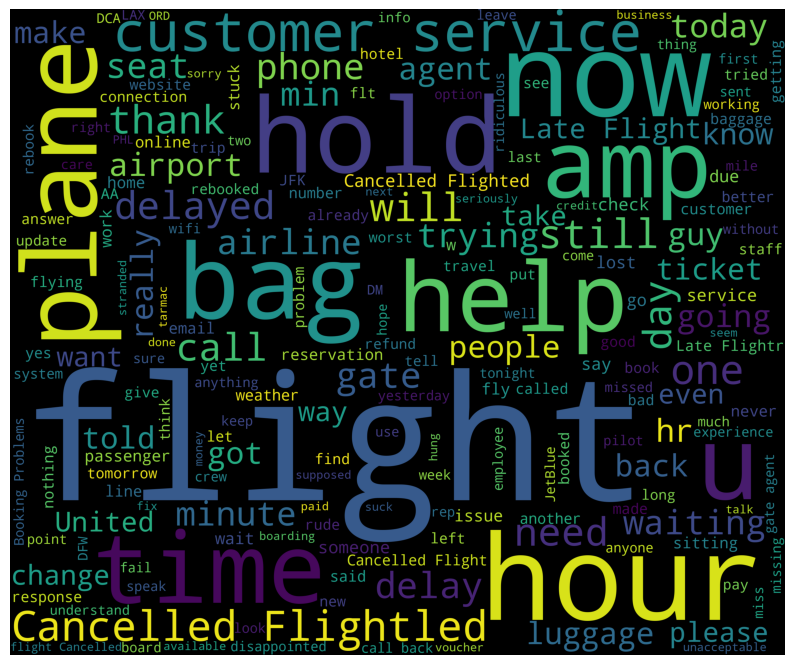

In [64]:
data_new=data[data['airline_sentiment']=='negative']
words = ' '.join(data_new['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [67]:
features = data.iloc[:, 10].values
labels = data.iloc[:, 1].values

#### Once we divide the data into features and training set, we can preprocess data in order to clean it.

In [74]:
import re

In [81]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [82]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [103]:
data = data[data['airline_sentiment']!='neutral']
data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,0,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,0,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


### Train-Test split

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2,random_state=18)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11712, 2301), (2928, 2301), (11712,), (2928,))

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [107]:
text_classifier_dt = DecisionTreeClassifier()
text_classifier_dt.fit(X_train, y_train)
predictions_dt = text_classifier_dt.predict(X_test)

In [108]:
print(confusion_matrix(y_test,predictions_dt))
print('accuracy score',accuracy_score(y_test, predictions_dt))

[[1458  273  119]
 [ 291  243   69]
 [ 127   93  255]]
accuracy score 0.6680327868852459


In [109]:
text_classifier_rf = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier_rf.fit(X_train, y_train)
predictions_rf = text_classifier_rf.predict(X_test)

In [110]:
print(confusion_matrix(y_test,predictions_rf))
print('accuracy score',accuracy_score(y_test, predictions_rf))

[[1728   88   34]
 [ 336  216   51]
 [ 136   74  265]]
accuracy score 0.7544398907103825


In [111]:
text_classifier_adb = AdaBoostClassifier()
text_classifier_adb.fit(X_train, y_train)
predictions_adb = text_classifier_adb.predict(X_test)

In [112]:
print(confusion_matrix(y_test,predictions_adb))
print('accuracy score',accuracy_score(y_test, predictions_adb))

[[1604  175   71]
 [ 332  209   62]
 [ 117   76  282]]
accuracy score 0.7155054644808743


In [113]:
text_classifier_gdb = GradientBoostingClassifier()
text_classifier_gdb.fit(X_train, y_train)
predictions_gdb = text_classifier_gdb.predict(X_test)

In [114]:
print(confusion_matrix(y_test,predictions_gdb))
print('accuracy score',accuracy_score(y_test, predictions_gdb))

[[1769   43   38]
 [ 439  122   42]
 [ 189   33  253]]
accuracy score 0.73224043715847


In [119]:
text_classifier_knn= KNeighborsClassifier()
text_classifier_knn.fit(X_train, y_train)
predictions_knn = text_classifier_knn.predict(X_test)

In [120]:
print(confusion_matrix(y_test,predictions_knn))
print('accuracy score',accuracy_score(y_test, predictions_knn))

[[1501  272   77]
 [ 253  301   49]
 [ 109  112  254]]
accuracy score 0.7021857923497268


### As we can see the Random Forest gives the best accuracy so we can go this model...